In [4]:
import pandas as pd
from path import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

## Data Preparation

In [5]:
file=Path('crypto_data.csv')

In [7]:
df=pd.read_csv(file, index_col=0)
df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [9]:
#list algorithims 
algorithims=set(df.Algorithm.values)
print(algorithims)

{'Exosis', 'X11GOST', 'PHI1612', 'Curve25519', 'Time Travel', 'Quark', 'Jump Consistent Hash', 'Lyra2Z', 'YescryptR16', 'Green Protocol', 'CryptoNight-V7', 'NeoScrypt', 'Progressive-n', 'QuarkTX', 'Rainforest', 'HybridScryptHash256', 'Blake2S', 'ECC 256K1', 'ScryptOG', 'Blake2b', 'XEVAN', 'M7 POW', 'DPoS', 'Argon2d', 'Argon2', 'Equihash', 'QUAIT', 'X11', 'PoS', 'CryptoNight', 'SHA3', 'Ethash', 'CryptoNight Heavy X', 'Keccak', 'Multiple', 'POS 3.0', 'Momentum', 'Scrypt-n', '536', 'Wild Keccak', 'SkunkHash v2 Raptor', 'XG Hash', 'TRC10', 'CryptoNight Heavy', 'SHA-512', 'Equihash1927', 'Equihash+Scrypt', 'C11', 'PHI2', 'Zhash', 'Proof-of-BibleHash', 'SkunkHash', 'HMQ1725', 'SHA-256 + Hive', 'Dagger-Hashimoto', 'Groestl', 'Scrypt', 'VeChainThor Authority', 'Ouroboros', 'CryptoNight-lite', 'vDPOS', 'Leased POS', 'CryptoNight-Lite', 'POS 2.0', 'Dagger', 'Shabal256', 'Counterparty', 'Tribus', 'Cloverhash', 'Avesta hash', 'SHA-256', 'Proof-of-Authority', 'Lyra2RE', 'Cryptonight-GPU', 'M00N', '

In [11]:
# Discard all cryptocurrencies that are not being traded. 
# In other words, filter for currencies that are currently being traded. 
# Once you have done this, drop the IsTrading column from the dataframe.
df['IsTrading'].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [18]:
df1=df.loc[df['IsTrading']==True]

In [19]:
df1=df1.drop(columns='IsTrading')
df1

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [20]:
# Remove all rows that have at least one null value.
df1=df1.dropna()

In [21]:
# Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.
df1=df1.loc[df["TotalCoinsMined"]>0]

In [22]:
# Since the coin names do not contribute to the analysis of the data, delete the CoinName from the original dataframe.
df1=df1.drop(columns='CoinName')

In [23]:
df1

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [24]:
# use Pandas to create dummy variables. 

x=pd.get_dummies(data=df1,columns=['Algorithm','ProofType'])

In [25]:
x

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Examine the number of rows and columns of your dataset now. How did they change?

Number of rows stayed the same at 532. 
Number of columns increased from 4 to 98

In [26]:
# Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.

In [27]:
scaler= StandardScaler()
x_scaled=scaler.fit_transform(x)

## Dimensionality Reduction

In [33]:
# Perform dimensionality reduction with PCA.99%
pca=PCA(n_components=0.99)
prin_components=pca.fit_transform(x_scaled)
prin_components.shape

(532, 86)

In [34]:
pca.explained_variance_.sum()

97.35133315075761

In [35]:
# Perform dimensionality reduction with PCA.90%
pca=PCA(n_components=0.90)
prin_components=pca.fit_transform(x_scaled)
prin_components.shape

(532, 74)

In [36]:
pca.explained_variance_.sum()

88.47283457566151

## How did the number of the features change?

Number of features reduced from 86 to 74. Explained Variance decreased from 97 to 88. 

In [39]:
# run t-SNE on the principal components: the output of the PCA transformation
tsne1=TSNE(perplexity=50)
tsne1Feats=tsne1.fit_transform(prin_components)

In [41]:
tsne1Feats.shape

(532, 2)

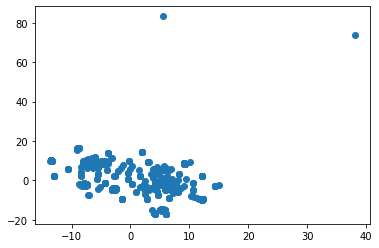

In [42]:
# create a scatter plot of the t-SNE output. 
x=tsne1Feats[:,0]
y=tsne1Feats[:,1]

plt.scatter(x,y)
plt.show()

## Observe whether there are distinct clusters or not.
Not necessarily clusters... 

## Cluster Analysis with k-Means

In [45]:
# Use a for-loop to determine the inertia for each k between 1 through 10. 

inertia =[]
k=[1,2,3,4,5,6,7,8,9,10]

for value in k:
    kmeans=KMeans(n_clusters=value,random_state=0)
    kmeans.fit(prin_components)
    inertia.append(kmeans.inertia_)

C:\Users\ostri\anaconda3\envs\pythondata\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


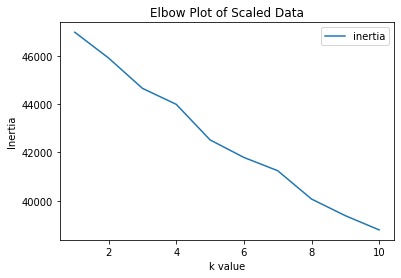

In [46]:
# Create an elbow plot to identify the best number of clusters. 

elbow=pd.DataFrame({'k':k,
                   'inertia':inertia})
elbow.plot.line(x='k',y='inertia')
plt.ylabel('Inertia')
plt.xlabel('k value')
plt.title('Elbow Plot of Scaled Data')
plt.show()

## Determine, if possible, where the elbow of the plot is, and at which value of k it appears.

No Elbow 

No Meaningful clustering within dataset 

## Conclusions 

No meaningful conclusions can be made for this data set. The t-SNE of the PCA Transformed data showed no distinct clusters and the Elbow plot of the scaled data showed no distinct elbow, showing no meaningful clusters. 